In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = "Hadoop"
dir_path = "../data/"

In [5]:
# Cargar el dataset
logDF = pd.read_csv(f"{dir_path}{dataset}_2k.log_structured.csv")
categorias = {
    'ERROR': 'Error',
    'FATAL': 'Error',
    'INFO': 'Informativo',
    'WARN': 'Advertencia'
}
logDF['Level'] = logDF['Level'].replace(categorias)

logDF.head(2)


,LineId,Date,Time,Level,Process,Component,Content,EventId,EventTemplate
0,1,2015-10-18,"18:01:47,978",Informativo,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Created MRAppMaster for application appattempt...,E29,Created MRAppMaster for application appattempt...
1,2,2015-10-18,"18:01:48,963",Informativo,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Executing with tokens:,E42,Executing with tokens:


In [7]:
# Convertir columna 'Time' a datetime
logDF['datetime'] = pd.to_datetime(logDF['Date'] + ' ' + logDF['Time'], errors='coerce')

# Formatear al formato 'YYYY-MM-DD HH:MM:SS.mmm'
logDF['datetime'] = logDF['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]

logDF.head()

C:\Users\KARINA\AppData\Local\Temp\ipykernel_26232\3100042223.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  logDF['datetime'] = pd.to_datetime(logDF['Date'] + ' ' + logDF['Time'], errors='coerce')


,LineId,Date,Time,Level,Process,Component,Content,EventId,EventTemplate,datetime
0,1,2015-10-18,"18:01:47,978",Informativo,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Created MRAppMaster for application appattempt...,E29,Created MRAppMaster for application appattempt...,2015-10-18 18:01:47.000
1,2,2015-10-18,"18:01:48,963",Informativo,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Executing with tokens:,E42,Executing with tokens:,2015-10-18 18:01:48.000
2,3,2015-10-18,"18:01:48,963",Informativo,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",E61,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",2015-10-18 18:01:48.000
3,4,2015-10-18,"18:01:49,228",Informativo,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Using mapred newApiCommitter.,E111,Using mapred newApiCommitter.,2015-10-18 18:01:49.000
4,5,2015-10-18,"18:01:50,353",Informativo,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,OutputCommitter set in config null,E76,OutputCommitter set in config null,2015-10-18 18:01:50.000


In [8]:
# Longitud de cada mensaje (# palabras)
logDF['content_length'] = logDF['Content'].astype(str).apply(lambda x: len(x.split()))


In [9]:
# Estadísticas
print("Total de registros:", len(logDF))
print("Rango temporal:", logDF['datetime'].min(), "→", logDF['datetime'].max())
print("Distribución por nivel:", logDF['Level'].value_counts())
print("Longitud de mensaje (palabras) con promedio:", logDF['content_length'].mean())
print("Longitud de mensaje (palabras) con mediana:", logDF['content_length'].median())

Total de registros: 2000
Rango temporal: 2015-10-18 18:01:47.000 → 2015-10-18 18:10:55.000
Distribución por nivel: Level
Informativo    1040
Advertencia     808
Error           152
Name: count, dtype: int64
Longitud de mensaje (palabras) con promedio: 8.1945
Longitud de mensaje (palabras) con mediana: 7.0


C:\Users\KARINA\AppData\Local\Temp\ipykernel_26232\3905531008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=logDF, x='Level', order=logDF['Level'].value_counts().index, palette="Set2")


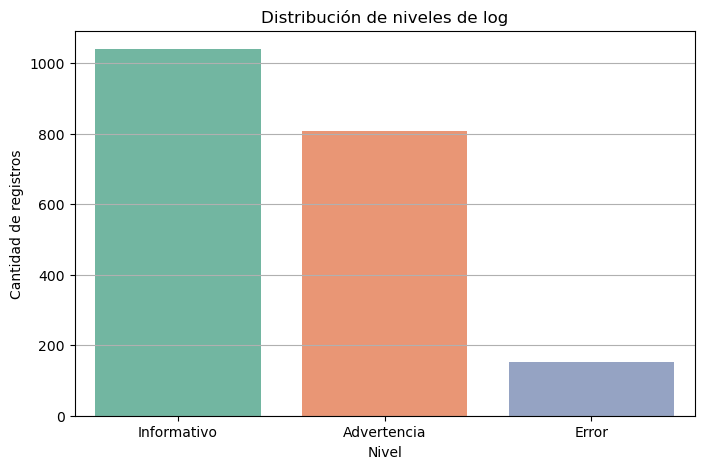

In [10]:
# Distribución por nivel
plt.figure(figsize=(8,5))
sns.countplot(data=logDF, x='Level', order=logDF['Level'].value_counts().index, palette="Set2")
plt.title("Distribución de niveles de log")
plt.xlabel("Nivel")
plt.ylabel("Cantidad de registros")
plt.grid(axis='y')
plt.show()

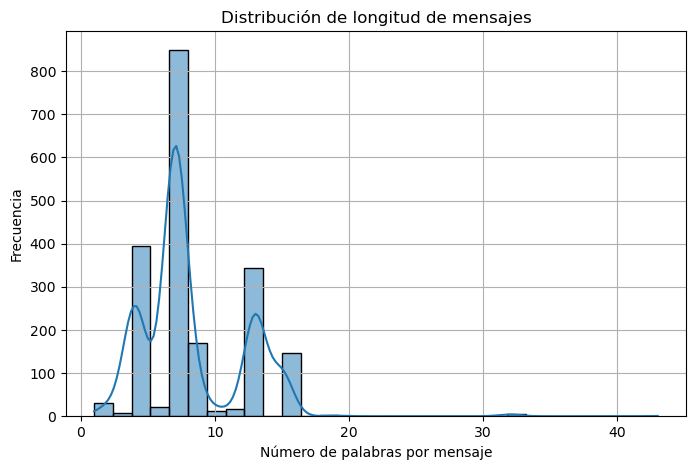

In [11]:
# Longitud de mensajes
plt.figure(figsize=(8,5))
sns.histplot(logDF['content_length'], bins=30, kde=True)
plt.title("Distribución de longitud de mensajes")
plt.xlabel("Número de palabras por mensaje")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

In [12]:
logDF.to_csv(f"{dir_path}{dataset}_2k.log_structured_to_process.csv", index=False, encoding='utf-8')